<a href="https://colab.research.google.com/github/zhemeduogewangtianyi/246859.github.io/blob/main/%E2%80%9Cstable_diffusion_webui_colab_chilloutmixni_koreandolllikeness_LoRA_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

遇到问题可以在 [GitHub Repo](https://github.com/KKGo1999/Stable-diffusion-person)中留下issue。或通过 www.kkgo1999.top +WX问答

# 1. Setup the Stable Diffusion Web UI with ChilloutMix model

In [ ]:
!pip install --upgrade fastapi==0.90.1
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui
!git clone https://github.com/yfszzx/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser

# Model(s) setup
# Below are model code for ChilloutMix, we always could change it to your desired model
!curl -Lo chilloutmixni.safetensors https://huggingface.co/nolanaatama/chomni/resolve/main/chomni.safetensors
!mv "/content/chilloutmixni.safetensors" "/content/stable-diffusion-webui/models/Stable-diffusion"

# Additional embeddings
!curl -Lo ulzzang-6500.pt https://huggingface.co/nolanaatama/chomni/resolve/main/ulzzang-6500.pt
!mv "/content/ulzzang-6500.pt" "/content/stable-diffusion-webui/embeddings"

%cd /content/stable-diffusion-webui
!git checkout 91c8d0d
!COMMANDLINE_ARGS="--share --disable-safe-unpickle --enable-insecure-extension-access" REQS_FILE="requirements.txt" python launch.py

# 2. After the gradio link show up, stop the first cell 等待上步执行完毕（Gradio 链接出现）后，停止上个单元格
---

# 3. Load the LoRA & launch the web ui 加载LoRA模型bing重启Web UI

In [ ]:
!curl -Lo koreanDollLikeness_v10.safetensors https://huggingface.co/nolanaatama/kdllora/resolve/main/kdllora.safetensors
#curl -Lo koreanDollLikeness_v10.safetensors https://civitai.com/api/download/models/14014
!mv "/content/stable-diffusion-webui/koreanDollLikeness_v10.safetensors" "/content/stable-diffusion-webui/models/Lora"
!COMMANDLINE_ARGS="--share --disable-safe-unpickle --no-half-vae --xformers --reinstall-xformers --enable-insecure-extension-access" REQS_FILE="requirements.txt" python launch.py

## 4. Display all generated images
所有的图片都保存在下面的路径，运行以展示

In [ ]:
# 看看一共有多少图
!ls /content/stable-diffusion-webui/outputs/txt2img-images/ | wc -l

2


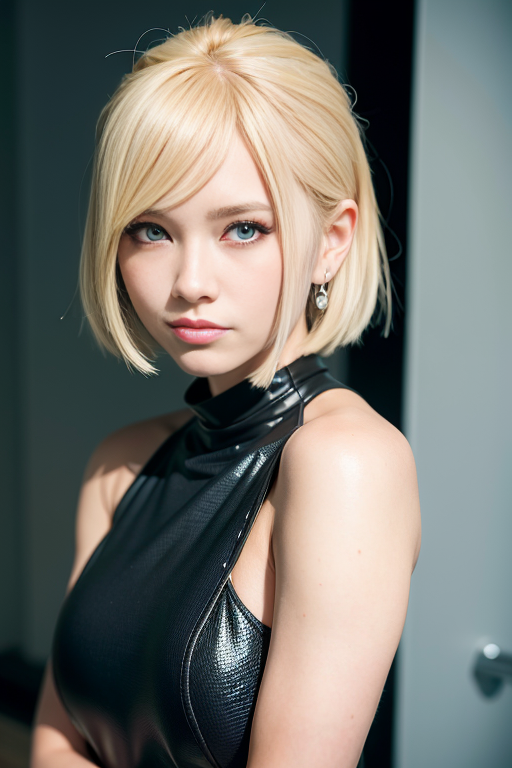

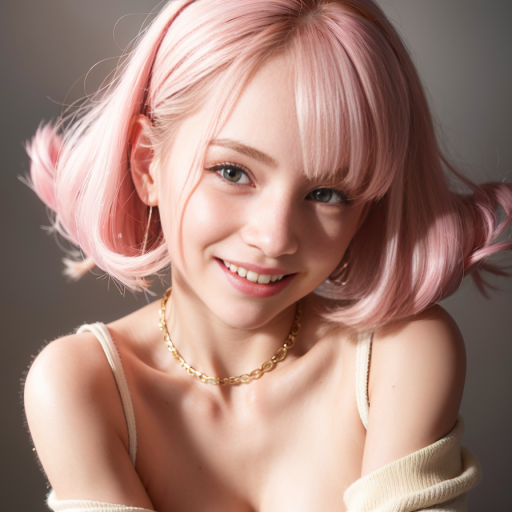

In [ ]:
# 显示所有图片
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import imutils
import os

# 指定目录
directory = '/content/stable-diffusion-webui/outputs/txt2img-images/'

# 获取目录中的所有文件
files = os.listdir(directory)

# 过滤出所有图片文件
images = [f for f in files if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# 将每张图片合并到空白图片上
for i, image_file in enumerate(images):
    img = cv.imread(os.path.join(directory, image_file))

    # 调整图像大小
    img = imutils.resize(img, width=512)
    cv2_imshow(img)